# Main Notebook Summary

This notebook offers a comprehensive guide through a data processing and modeling project, structured into key sections:

## Data Processing
- **Collection & Processing**: Utilizes `src.dataset.creation` for data collection and `src.dataset.processing` for processing, summarizing the data.

## Dataset and Overlap
- **Dataset Creation**: Demonstrates dataset creation and printing using `src.dataset.torch` and `src.dataset.torch_overlap`.

## Data Synchronization
- **Synchronization**: Features data synchronization with `src.fabric_sync.data_sync`.

## Modeling
- **Training & Usage**: Details model training (LSTM, neural networks) via `src.machine_learning.train_models` and their application through `src.machine_learning.use_models`.

## Analytics and Reporting
- **Analysis & Visualization**: Engages in data analysis (`src.analytics.analytics`), visualization (`src.analytics.graphs`), and reporting (`src.utils.reporting`).

Explore and run the cells to delve into the project's data handling, modeling, and analytical aspects.

---
## Data Process:

### Data Collection:

In [3]:
from nba_analytics.utils.config import settings

cloud = settings.cloud

print(cloud.SQL_SERVER_DOMAIN)

.database.windows.net


In [1]:
import nba_analytics.data.io.creation as dc

dc.collect_data()

| 2024-07-29 13:05:56,803 - INFO - creation.update_players_csv:
---| Generating new data for nba_players_bronze_basic.csv for year 2001
| 2024-07-29 13:05:56,816 - INFO - creation.update_players_csv:
---| Generating new data for nba_players_bronze_advanced.csv for year 2001
| 2024-07-29 13:05:56,827 - INFO - creation.update_players_csv:
---| Data saved to e:\repos\nba_project\nba_analytics\data/datasets/bronze/nba_players_bronze_basic.csv and e:\repos\nba_project\nba_analytics\data/datasets/bronze/nba_players_bronze_advanced.csv for year 2001
| 2024-07-29 13:06:02,214 - INFO - creation.update_players_csv:
---| Appending new data to nba_players_bronze_basic.csv for year 2002
| 2024-07-29 13:06:03,055 - INFO - creation.update_players_csv:
---| Appending new data to nba_players_bronze_advanced.csv for year 2002
| 2024-07-29 13:06:04,065 - INFO - creation.update_players_csv:
---| Data saved to e:\repos\nba_project\nba_analytics\data/datasets/bronze/nba_players_bronze_basic.csv and e:\repos

### SQL Import Stats

In [ ]:
from nba_analytics.data.io.sql import csv_to_sql
from nba_analytics.utils.config import settings
from nba_analytics.utils import filename_grabber

settings.cloud.SQL_SERVER_NAME = ''
settings.cloud.SQL_DATABASE_NAME = ''
settings.cloud.SQL_TABLE_NAME = ''
settings.cloud.SQL_USERNAME = ''
settings.cloud.SQL_PASSWORD = ''

basic_path = filename_grabber.get_data_file('bronze', settings.DATA_FILE_BASIC)
advanced_path = filename_grabber.get_data_file('bronze', settings.PLAYERS_ADVANCED_NAME)

csv_to_sql(basic_path, advanced_path)

### Bronze To Silver

In [1]:
from nba_analytics.data.medallion import bronze_to_silver as b2s

# Run the processing
b2s.run_processing()

| 2024-07-30 20:25:55,821 - DEBUG - bronze_to_silver.create_silver_dataset:
---| Filtering dataset for players who have played for more than 5 years...
| 2024-07-30 20:25:55,823 - DEBUG - cleaning.clean_rows:
---| Cleaning rows...
| 2024-07-30 20:25:55,861 - DEBUG - cleaning.clean_columns:
---| Cleaning columns...
| 2024-07-30 20:25:55,865 - DEBUG - cleaning.clean_columns:
---| Cleaned columns: ['is_combined_totals'].
| 2024-07-30 20:25:55,867 - DEBUG - cleaning.clean_nontensor_values:
---| Filtering non-tensor values...
| 2024-07-30 20:26:02,133 - DEBUG - bronze_to_silver.save_df_and_dict:
---| Saving dataset to 'e:\repos\nba_project\nba_analytics\data/datasets/silver/'...
| 2024-07-30 20:26:02,309 - DEBUG - bronze_to_silver.save_df_and_dict:
---| Cleaned Silver dataset saved to: 'e:\repos\nba_project\nba_analytics\data/datasets/silver/nba_players_silver.csv'.
| 2024-07-30 20:26:02,410 - DEBUG - bronze_to_silver.save_df_and_dict:
---| Cleaned Silver dictionary saved to: 'e:\repos\nba_

(            slug  age  games_played  games_started  minutes_played  \
 0      abdulma02   31            41              0             486   
 1      abdulta01   26            29             12             420   
 2      abdursh01   24            81             81            3241   
 3      alexaco01   27            26              0             227   
 6      allenra02   25            82             82            3129   
 ...          ...  ...           ...            ...             ...   
 11703  youngth01   35            23              6             350   
 11704  youngtr01   25            54             54            1942   
 11705  yurtsom01   25            48             12             545   
 11706  zelleco01   31            43              0             320   
 11707  zubaciv01   26            68             68            1794   
 
        made_field_goals  attempted_field_goals  made_three_point_field_goals  \
 0                   120                    246                  

### Silver to Gold

In [2]:
from nba_analytics.data.medallion import silver_to_gold as s2g

s2g.run_processing()

| 2024-07-30 20:26:02,521 - DEBUG - silver_to_gold.create_gold_datasets:
---| Filtering dataset for players who have played for more than 5 years...
| 2024-07-30 20:26:04,099 - DEBUG - filtering.filter_atleast_continuous_years:
---| Filtering players who have continuous stretches of at least 5 years...
| 2024-07-30 20:26:04,635 - DEBUG - filtering.filter_first_continuous_years:
---| Filtering players for a continuous stretch of 5 years in their first 5 years...
| 2024-07-30 20:26:05,190 - DEBUG - processing.create_overlap_data:
---| Creating overlap data...
| 2024-07-30 20:26:05,268 - DEBUG - silver_to_gold.save_df_and_dict:
---| Saving filtered dataset to 'e:\repos\nba_project\nba_analytics\data/datasets/gold/nba_players_gold.csv'...
| 2024-07-30 20:26:05,269 - DEBUG - silver_to_gold.save_df_and_dict:
---| Saving first continuous dataset to 'e:\repos\nba_project\nba_analytics\data/datasets/gold/nba_players_gold_continuous_first.csv'...
| 2024-07-30 20:26:05,269 - DEBUG - silver_to_gol

GoldDataset(df_filtered=            slug  Year  age  minutes_played  made_field_goals  \
0      abdulma02  2001   31             486               120   
1      abdulta01  2001   26             420                43   
2      abdursh01  2001   24            3241               604   
3      alexaco01  2001   27             227                18   
4      allenra02  2001   25            3129               628   
...          ...   ...  ...             ...               ...   
11607  youngth01  2024   35             350                54   
11608  youngtr01  2024   25            1942               433   
11609  yurtsom01  2024   25             545                99   
11610  zelleco01  2024   31             320                26   
11611  zubaciv01  2024   26            1794               337   

       attempted_field_goals  attempted_three_point_field_goals  \
0                        246                                 14   
1                        111                                 

### Data to SQL

In [1]:
# import nba_analytics.dataset.sql
from nba_analytics.data.io.sql import create_sql_table, view_table
from nba_analytics.utils.config import settings
from nba_analytics.utils import filename_grabber

cloud = settings.cloud

# Enable for changing table name
# cloud.SQL_TABLE_NAME = ''

create_sql_table()

data = view_table(cloud.SQL_TABLE_NAME)

print(data)

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'NoneType'

### Dataset Creation

In [ ]:
from nba_analytics.data.dataset import torch as t
from nba_analytics.data.dataset import torch_overlap as to

# dataset = dt.create_dataset()

t.print_dataset_example()

to.print_dataset_example()

| 2024-06-28 01:14:30,941 - INFO - torch.print_dataset_example:
---| Testing creation of NBAPlayerDataset class...
| 2024-06-28 01:14:30,944 - INFO - torch.create_dataset:
---| Creating dataset...
| 2024-06-28 01:14:30,945 - INFO - torch.create_dataset:
---| Loading data from data/nba_player_stats_5years.csv, data/nba_player_stats_5years_tensor_ready.csv, and data/nba_player_stats_5years.json...
| 2024-06-28 01:14:31,055 - INFO - torch.create_dataset:
---| Dataset created successfully.
| 2024-06-28 01:14:31,078 - INFO - torch.print_dataset_example:
---| Player Data:
tensor([ 0.5405,  0.1341,  1.2991,  1.2505,  0.5679, -0.9306,  1.0175,  0.7062,
         0.7140,  1.2769,  1.0023,  0.8792], dtype=torch.float64)
Players Targets:
tensor([[-0.1277, -1.3487, -0.3164, -0.8599, -0.9176, -0.9441, -0.0947, -0.0685,
         -0.1996, -0.5963,  1.0653, -0.6374],
        [ 0.0394, -0.9780,  0.4025, -0.1227, -0.3144, -0.9306,  0.4169,  0.8667,
          0.2492, -0.0184,  1.1072, -0.3485],
        [ 

---
## Modeling:

In [ ]:
from nba_analytics.machine_learning import train_models as tm

# Use:
   # 1. 'nn_lstm' for the LSTM model 
   # 2. 'custom_lstm' for the custom LSTM model
   # 3. 'nn_one_to_one' for the one to one neural network model
   # 4. 'nn_many_to_one' for the many to one neural network model
model = tm.run_model('nn_lstm', 100)
model = tm.run_model('nn_one_to_one', 100)
model = tm.run_model('nn_many_to_one', 100)

| 2024-06-28 02:08:30,604 - INFO - train_models.run_model:
---| Running nn_one_to_one model on cpu...
| 2024-06-28 02:08:30,604 - INFO - train_models.run_model:
---| Hyperparameters: input_size=12, hidden_size=12, output_size=12, num_layers=5.
                Using learning rate of: 0.01.
                Using device: cpu.
                Training DataLoader length: 44
                Test DataLoader length: 44


| 2024-06-28 02:08:34,682 - INFO - train_models.run_model:
---| Training model (starting loop)...


Epoch: 100/100, Batch: 44/44: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s, Loss=0.349]

| 2024-06-28 02:09:56,694 - INFO - train_models.run_model:
---| Evaluating model...



Batch: 44/44: 100%|██████████| 44/44 [00:34<00:00,  1.26it/s, Loss=0.509]

| 2024-06-28 02:10:31,623 - INFO - train_models.run_model:
---| Saving model at data/models/nn_one_to_one.pth.
| 2024-06-28 02:10:31,634 - INFO - train_models.run_model:
---| Confirmation: Model saved at data/models/nn_one_to_one.pth.


In [ ]:
from nba_analytics.machine_learning import use_models as um

um.use_model(-1)

| 2024-06-23 22:14:39,151 - INFO - use_models.use_model:
---| Found .pth files: ['nn_lstm.pth', 'nn_many_to_one.pth', 'nn_one_to_one.pth']
| 2024-06-23 22:14:39,152 - INFO - use_models.use_model:
---| Using argument file index -1.
| 2024-06-23 22:14:39,152 - INFO - use_models.load_model:
---| Loading nn_one_to_one.pth and creating model...
| 2024-06-23 22:14:39,241 - INFO - use_models.load_model:
---| Loaded model: CustomNN(
  (fc1): Linear(in_features=12, out_features=12, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=12, out_features=12, bias=True)
)
| 2024-06-23 22:14:39,242 - INFO - torch.get_dataset_example:
---| Getting example from dataset...
| 2024-06-23 22:14:39,242 - INFO - torch.create_dataset:
---| Creating dataset...
| 2024-06-23 22:14:39,243 - INFO - torch.create_dataset:
---| Loading data from data/nba_player_stats_5years.csv, data/nba_player_stats_5years_tensor_ready.csv, and data/nba_player_stats_5years.json...
| 2024-06-23 22:14:39,298 - INFO - torch.create_d

---
## Analytics and Reporting:

In [ ]:
from nba_analytics.analytics import analytics as an
from nba_analytics.analytics import graphs as graphs

graphs.create_pca_plot()
graphs.create_data_graphs()

| 2024-06-28 02:14:54,894 - INFO - use_models.use_model:
---| Found .pth files: ['nn_lstm.pth', 'nn_many_to_one.pth', 'nn_one_to_one.pth']
| 2024-06-28 02:14:54,894 - INFO - use_models.use_model:
---| Using all indices (-1 given).
| 2024-06-28 02:14:54,900 - INFO - use_models.load_model:
---| Loading nn_lstm.pth and creating model...
| 2024-06-28 02:14:54,909 - INFO - use_models.load_model:
---| Loaded model: LSTM(12, 12, num_layers=5, batch_first=True)
| 2024-06-28 02:14:54,909 - INFO - torch_overlap.get_dataset_example:
---| Getting example from dataset...
| 2024-06-28 02:14:54,909 - INFO - torch_overlap.create_dataset:
---| Creating dataset...
| 2024-06-28 02:14:54,917 - INFO - torch_overlap.create_dataset:
---| Loading data from nba_player_stats_5years.csv, nba_player_stats_5years_overlap.csv, and nba_player_stats_5years.json...
| 2024-06-28 02:14:55,282 - INFO - torch_overlap.create_dataset:
---| Dataset created successfully.
| 2024-06-28 02:14:55,374 - INFO - use_models.use_model

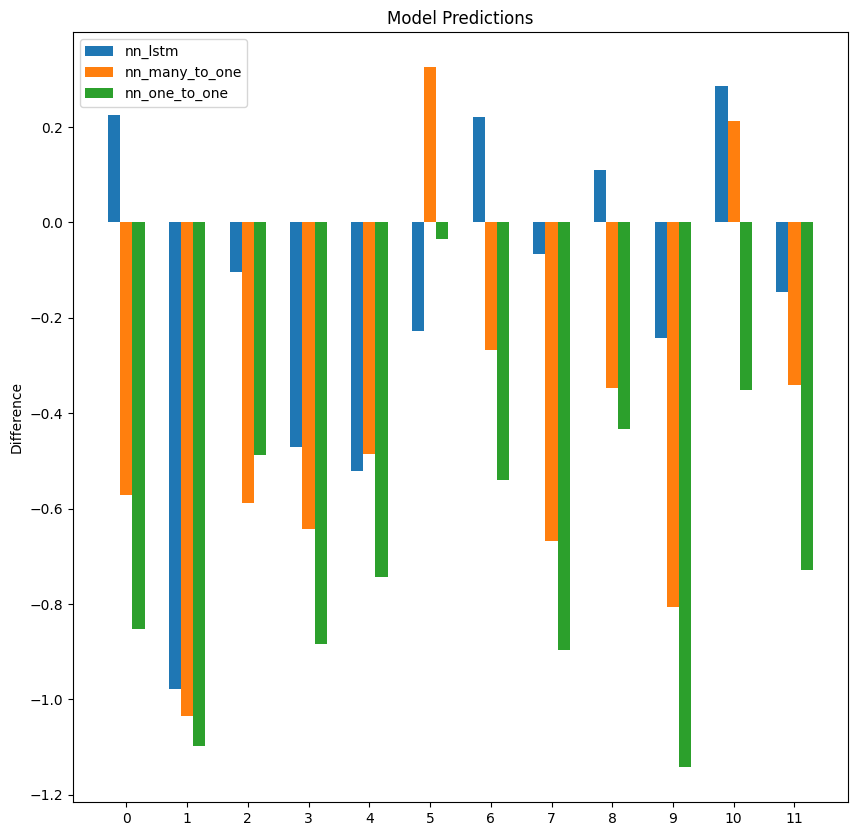

In [ ]:
from nba_analytics.analytics import graphs as graphs

graphs.create_prediction_graphs()

In [ ]:
# Create report
from nba_analytics.utils.reporting import create_report

create_report()